# Stress Time of Day Analysis

This notebook analyzes how stress levels vary throughout the day and across different days of the week.

**Analysis includes:**
- Average stress levels by hour of day (0-23)
- Peak stress times and low-stress periods
- Stress patterns by day of week
- Time period comparisons (morning, afternoon, evening, night)
- Heatmap visualizations showing stress patterns across days and hours
- Statistical summaries with confidence intervals


In [1]:
# Import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging
from datetime import datetime
from pathlib import Path

# Import our analysis functions
from garmin_analysis.features.time_of_day_stress_analysis import (
    load_stress_data,
    calculate_hourly_stress_averages,
    calculate_hourly_stress_by_weekday,
    plot_hourly_stress_pattern,
    plot_stress_heatmap_by_weekday,
    print_stress_summary
)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Configure plot style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


## 1. Load Stress Data

Load stress measurements from the Garmin database. The stress data includes timestamp and stress level measurements throughout each day.


In [2]:
# Load stress data from database
logger.info("Loading stress data...")
stress_df = load_stress_data()

print(f"✓ Loaded {len(stress_df):,} stress measurements")
print(f"Date range: {stress_df['timestamp'].min()} to {stress_df['timestamp'].max()}")
print(f"\nDataFrame shape: {stress_df.shape}")
print(f"\nStress statistics:")
print(f"  Mean: {stress_df['stress'].mean():.1f}")
print(f"  Median: {stress_df['stress'].median():.1f}")
print(f"  Min: {stress_df['stress'].min():.0f}")
print(f"  Max: {stress_df['stress'].max():.0f}")
print(f"  Std Dev: {stress_df['stress'].std():.1f}")

# Display sample
stress_df.head(10)


2025-10-17 10:41:51,219 - __main__ - INFO - Loading stress data...
2025-10-17 10:41:51,229 - garmin_analysis.features.time_of_day_stress_analysis - INFO - Loading stress data from /Users/chang-hyunmungai/Code/garmin-analysis/db/garmin.db
2025-10-17 10:41:52,233 - garmin_analysis.features.time_of_day_stress_analysis - INFO - Loaded 1,003,864 stress measurements
✓ Loaded 1,003,864 stress measurements
Date range: 2022-12-02 03:01:00 to 2025-09-22 04:00:00

DataFrame shape: (1003864, 2)

Stress statistics:
  Mean: 15.1
  Median: 2.0
  Min: -2
  Max: 100
  Std Dev: 22.0


,timestamp,stress
0,2023-01-01 01:20:00,34
1,2023-01-01 01:21:00,24
2,2023-01-01 01:22:00,36
3,2023-01-01 01:23:00,32
4,2023-01-01 01:24:00,39
5,2023-01-01 01:25:00,28
6,2023-01-01 01:26:00,32
7,2023-01-01 01:27:00,37
8,2023-01-01 01:28:00,46
9,2023-01-01 01:29:00,34


## 2. Calculate Hourly Averages

Calculate average stress levels for each hour of the day (0-23).


In [3]:
# Calculate hourly averages
hourly_stats = calculate_hourly_stress_averages(stress_df)

print(f"✓ Calculated hourly averages for {len(hourly_stats)} hours")
print(f"\nHourly statistics summary:")
print(f"  Overall mean stress: {hourly_stats['mean'].mean():.1f}")
print(f"  Highest hourly average: {hourly_stats['mean'].max():.1f} (hour {int(hourly_stats.loc[hourly_stats['mean'].idxmax(), 'hour'])})")
print(f"  Lowest hourly average: {hourly_stats['mean'].min():.1f} (hour {int(hourly_stats.loc[hourly_stats['mean'].idxmin(), 'hour'])})")

# Display the data
hourly_stats


2025-10-17 10:47:36,175 - garmin_analysis.features.time_of_day_stress_analysis - INFO - Calculated hourly averages for 24 hours
✓ Calculated hourly averages for 24 hours

Hourly statistics summary:
  Overall mean stress: 15.1
  Highest hourly average: 19.0 (hour 20)
  Lowest hourly average: 10.1 (hour 11)


,hour,mean,median,std,min,max,count,ci_lower,ci_upper
0,0,18.005521,1.0,24.636262,-2,99,41839,17.769451,18.241591
1,1,16.515704,-1.0,23.285714,-2,99,41836,16.292568,16.738841
2,2,16.453948,7.0,22.838215,-2,99,41833,16.235092,16.672804
3,3,15.106667,7.0,20.936138,-2,99,41953,14.906325,15.307009
4,4,14.613735,8.0,20.149193,-2,99,41834,14.420650,14.806820
5,5,14.207324,8.0,19.555713,-2,99,41833,14.019924,14.394725
6,6,14.183390,8.0,19.571025,-2,99,41987,13.996187,14.370593
7,7,13.186286,7.0,18.276754,-2,98,41839,13.011154,13.361417
8,8,12.516294,7.0,17.668572,-2,99,41794,12.346899,12.685689
9,9,11.470042,5.0,16.832849,-2,99,41792,11.308656,11.631429


## 3. Calculate Stress by Hour and Day of Week

Analyze how stress patterns differ across days of the week.


In [4]:
# Calculate hourly averages by day of week
hourly_weekday_stats = calculate_hourly_stress_by_weekday(stress_df)

print(f"✓ Calculated {len(hourly_weekday_stats)} hour-weekday combinations")
print(f"\nStress by day of week (overall average):")

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for day in day_order:
    day_data = hourly_weekday_stats[hourly_weekday_stats['day_of_week'] == day]
    if not day_data.empty:
        avg_stress = day_data['mean'].mean()
        print(f"  {day:>9}: {avg_stress:.1f}")

# Display sample
hourly_weekday_stats.head(20)


2025-10-17 10:48:53,614 - garmin_analysis.features.time_of_day_stress_analysis - INFO - Calculated hourly averages by weekday: 168 records
✓ Calculated 168 hour-weekday combinations

Stress by day of week (overall average):
     Sunday: 14.2
     Monday: 15.9
    Tuesday: 14.3
  Wednesday: 14.9
   Thursday: 15.8
     Friday: 15.1
   Saturday: 15.4


,hour,day_of_week,day_of_week_num,mean,std,count
3,0,Sunday,0,16.762552,23.903597,6035
1,0,Monday,1,20.330498,25.436204,5879
5,0,Tuesday,2,18.778044,24.143894,5848
6,0,Wednesday,3,17.662242,24.793951,5951
4,0,Thursday,4,15.619460,22.462485,5889
0,0,Friday,5,17.655167,25.444302,6000
2,0,Saturday,6,19.209877,25.744876,6237
10,1,Sunday,0,15.506060,22.727917,6023
8,1,Monday,1,18.766044,24.008190,5890
12,1,Tuesday,2,16.501630,22.415246,5829


## 4. Detailed Summary Statistics

View comprehensive statistics about stress patterns.


In [5]:
# Print detailed summary
print_stress_summary(hourly_stats, hourly_weekday_stats)


2025-10-17 10:49:43,609 - garmin_analysis.features.time_of_day_stress_analysis - INFO - 
2025-10-17 10:49:43,613 - garmin_analysis.features.time_of_day_stress_analysis - INFO - STRESS ANALYSIS BY TIME OF DAY
2025-10-17 10:49:43,613 - garmin_analysis.features.time_of_day_stress_analysis - INFO - ======================================================================
2025-10-17 10:49:43,615 - garmin_analysis.features.time_of_day_stress_analysis - INFO - 
📊 Overall Stress Statistics:
2025-10-17 10:49:43,617 - garmin_analysis.features.time_of_day_stress_analysis - INFO - ----------------------------------------------------------------------
2025-10-17 10:49:43,638 - garmin_analysis.features.time_of_day_stress_analysis - INFO -   Total measurements: 1,003,864
2025-10-17 10:49:43,642 - garmin_analysis.features.time_of_day_stress_analysis - INFO -   Overall mean stress: 15.1
2025-10-17 10:49:43,644 - garmin_analysis.features.time_of_day_stress_analysis - INFO -   Overall std dev: 21.6
2025-10-

/Users/chang-hyunmungai/Code/garmin-analysis/src/garmin_analysis/features/time_of_day_stress_analysis.py:405: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_averages = hourly_weekday_stats.groupby('day_of_week')['mean'].mean()


## 5. Visualizations

### 5.1 Hourly Stress Pattern (Line Plot)


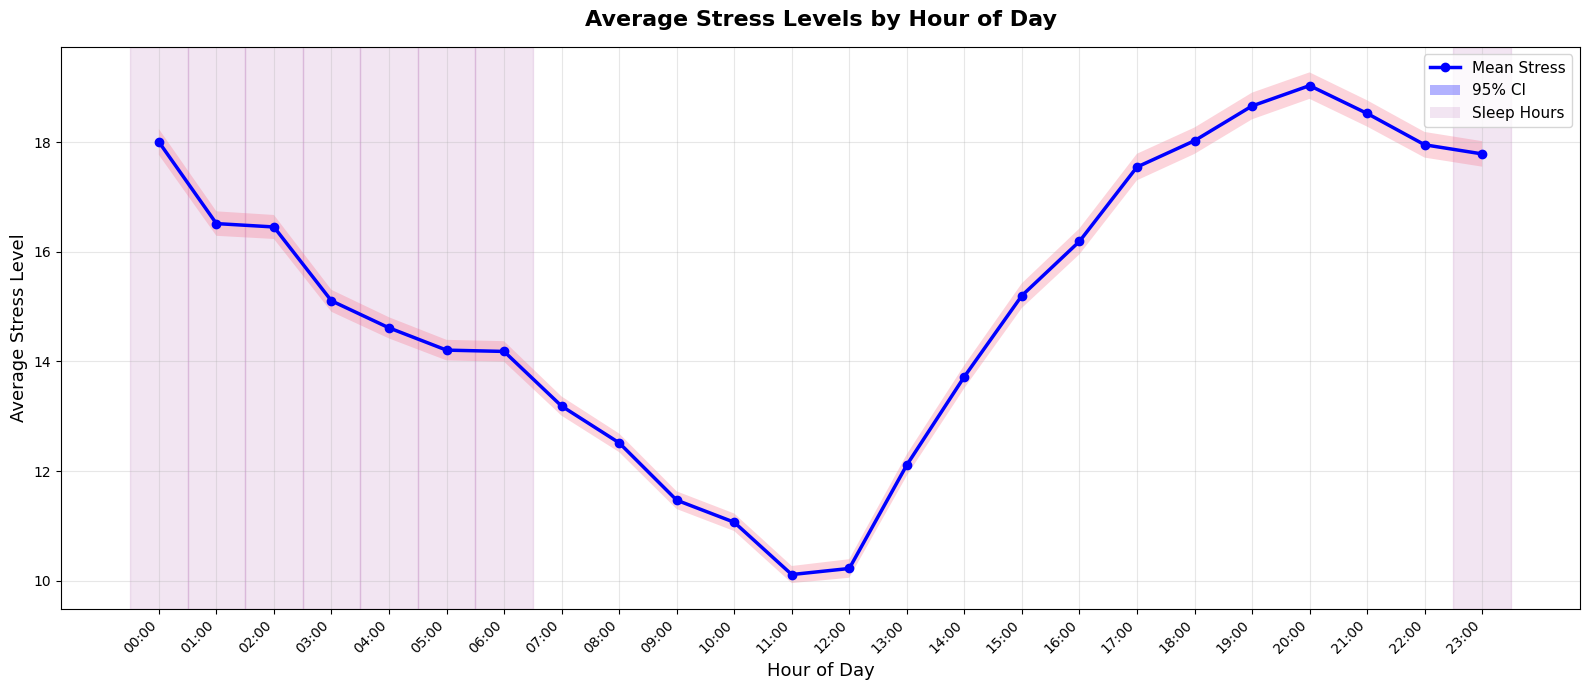

In [6]:
# Create line plot with confidence interval
fig, ax = plt.subplots(figsize=(16, 7))

hours = hourly_stats['hour']
means = hourly_stats['mean']
ci_lower = hourly_stats['ci_lower']
ci_upper = hourly_stats['ci_upper']

# Plot mean line
ax.plot(hours, means, 'b-', linewidth=2.5, label='Mean Stress', marker='o', markersize=6)

# Plot confidence interval
ax.fill_between(hours, ci_lower, ci_upper, alpha=0.3, label='95% CI')

# Highlight typical sleep hours (23:00 - 6:00)
sleep_hours = [23, 0, 1, 2, 3, 4, 5, 6]
for hour in sleep_hours:
    if hour in hours.values:
        ax.axvspan(hour - 0.5, hour + 0.5, alpha=0.1, color='purple', zorder=0)

# Add a custom legend entry for sleep hours
from matplotlib.patches import Patch
legend_elements = [
    plt.Line2D([0], [0], color='b', linewidth=2.5, marker='o', label='Mean Stress'),
    Patch(facecolor='blue', alpha=0.3, label='95% CI'),
    Patch(facecolor='purple', alpha=0.1, label='Sleep Hours')
]

ax.set_xlabel('Hour of Day', fontsize=13)
ax.set_ylabel('Average Stress Level', fontsize=13)
ax.set_title('Average Stress Levels by Hour of Day', fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


### 5.2 Hourly Stress Pattern (Bar Chart)


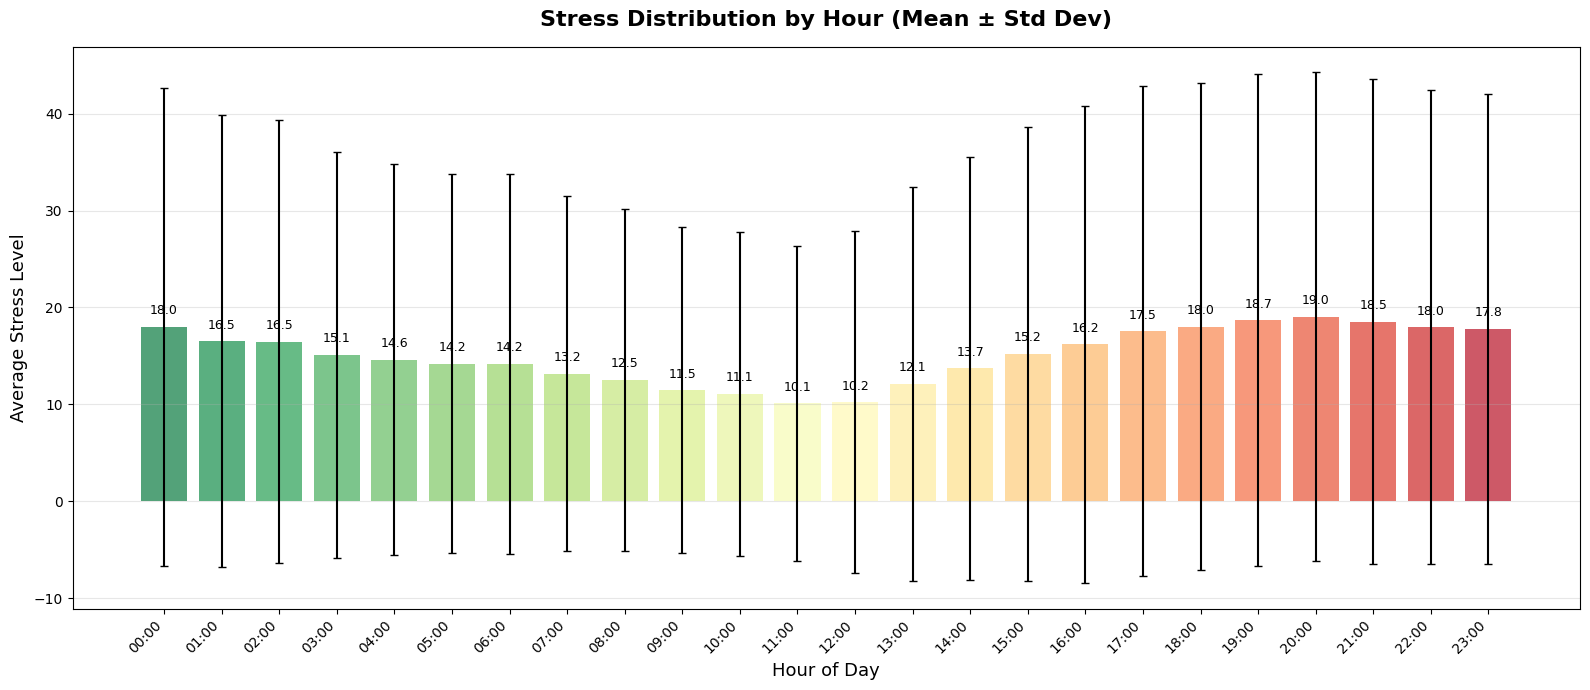

In [7]:
# Create bar chart with error bars
fig, ax = plt.subplots(figsize=(16, 7))

# Create a color gradient based on stress levels
colors = sns.color_palette("RdYlGn_r", len(hours))
bars = ax.bar(hours, means, yerr=hourly_stats['std'], capsize=3, alpha=0.7, color=colors)

ax.set_xlabel('Hour of Day', fontsize=13)
ax.set_ylabel('Average Stress Level', fontsize=13)
ax.set_title('Stress Distribution by Hour (Mean ± Std Dev)', fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar, value in zip(bars, means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 5.3 Stress Heatmap: Day of Week × Hour of Day


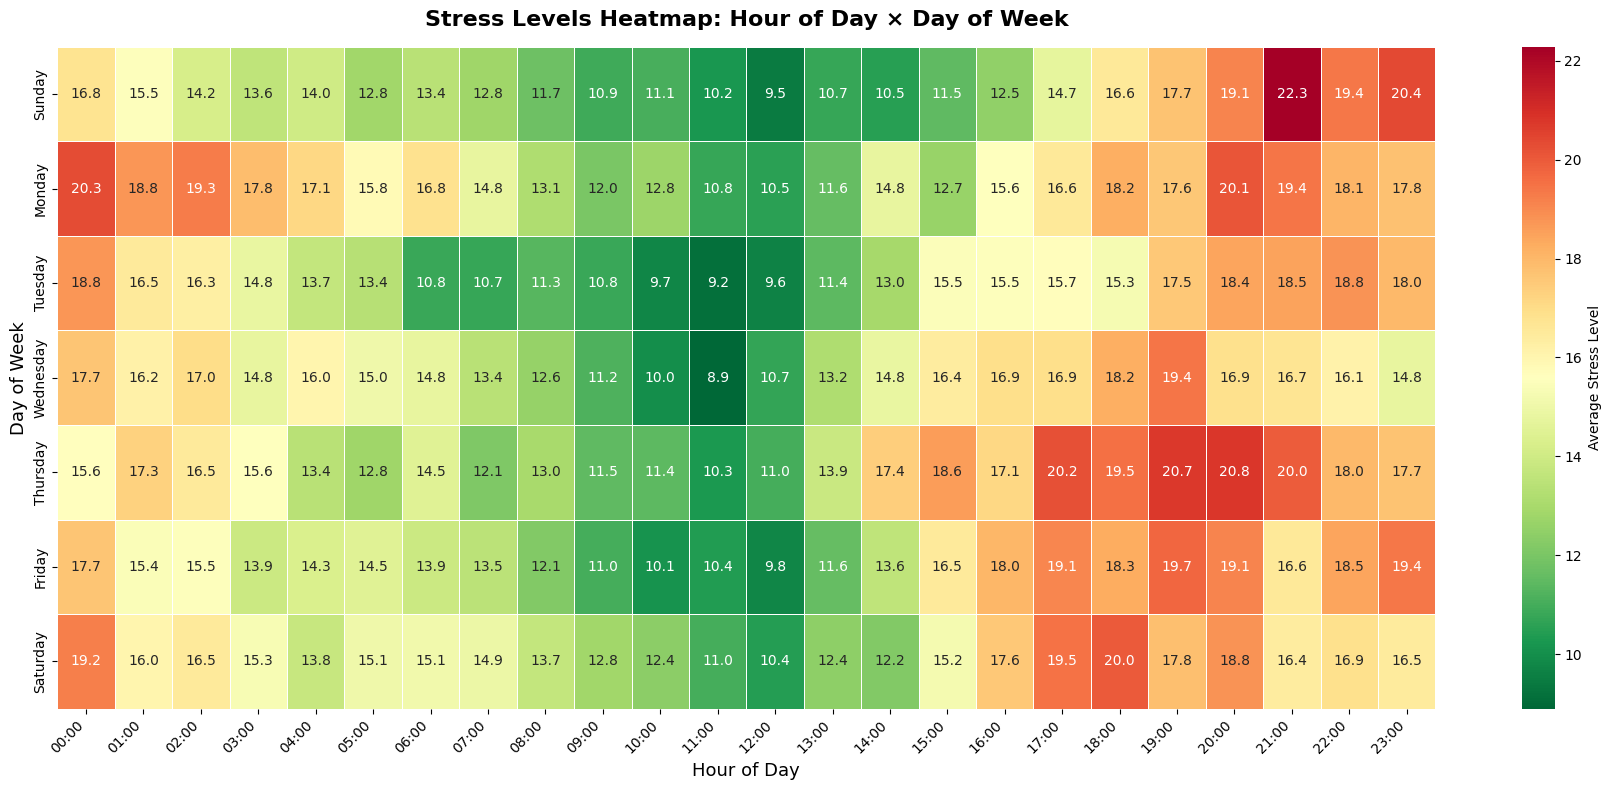

In [8]:
# Create heatmap
heatmap_data = hourly_weekday_stats.pivot(
    index='day_of_week', 
    columns='hour', 
    values='mean'
)

fig, ax = plt.subplots(figsize=(18, 8))

sns.heatmap(heatmap_data, cmap='RdYlGn_r', annot=True, fmt='.1f', 
            linewidths=0.5, cbar_kws={'label': 'Average Stress Level'},
            ax=ax, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

ax.set_xlabel('Hour of Day', fontsize=13)
ax.set_ylabel('Day of Week', fontsize=13)
ax.set_title('Stress Levels Heatmap: Hour of Day × Day of Week', 
            fontsize=16, fontweight='bold', pad=15)

# Format x-axis labels
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')

plt.tight_layout()
plt.show()


### 5.4 Stress Patterns by Day of Week (Line Plot)


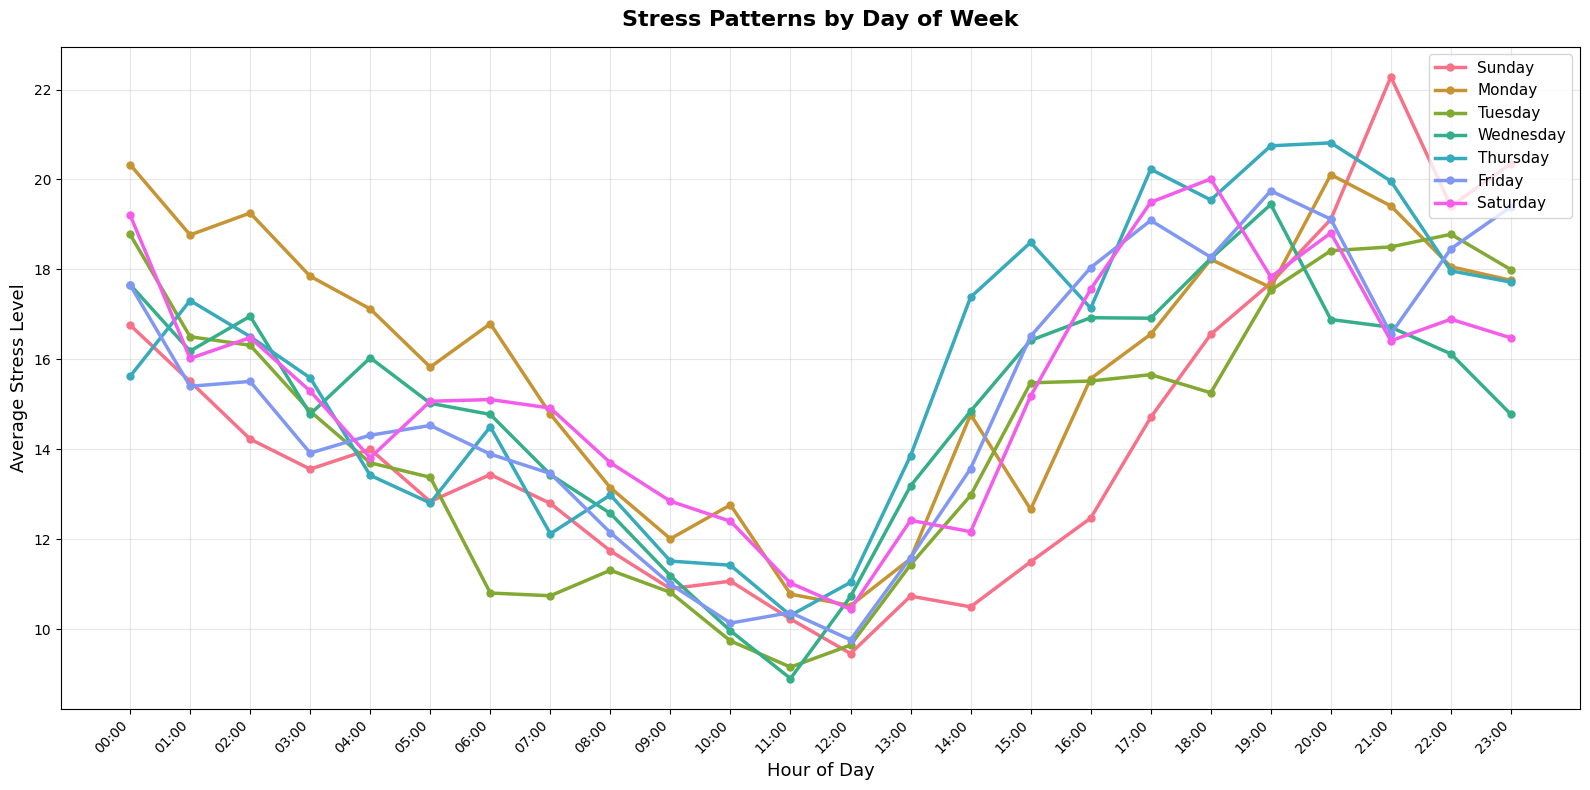

In [9]:
# Create line plot by day of week
fig, ax = plt.subplots(figsize=(16, 8))

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = sns.color_palette("husl", 7)

for i, day in enumerate(day_order):
    day_data = hourly_weekday_stats[hourly_weekday_stats['day_of_week'] == day]
    if not day_data.empty:
        ax.plot(day_data['hour'], day_data['mean'], 
               marker='o', linewidth=2.5, label=day, color=colors[i], markersize=5)

ax.set_xlabel('Hour of Day', fontsize=13)
ax.set_ylabel('Average Stress Level', fontsize=13)
ax.set_title('Stress Patterns by Day of Week', fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


## 6. Time Period Analysis

Compare stress levels across different time periods of the day.


Stress Levels by Time Period:
                 Period      Mean    Median   Std Dev  Min  Max
  Morning (06:00-11:59) 12.089454  5.500000 17.544740   -2  100
Afternoon (12:00-17:59) 14.166529 -1.000000 22.183418   -2  100
  Evening (18:00-22:59) 18.439725  1.400000 25.030098   -2   99
    Night (23:00-05:59) 16.098465  4.142857 22.240126   -2   99


/var/folders/jd/t99wfzv91d78zw87vd_tm7kh0000gn/T/ipykernel_58738/2261868656.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(box_data, labels=period_df['Period'], patch_artist=True)


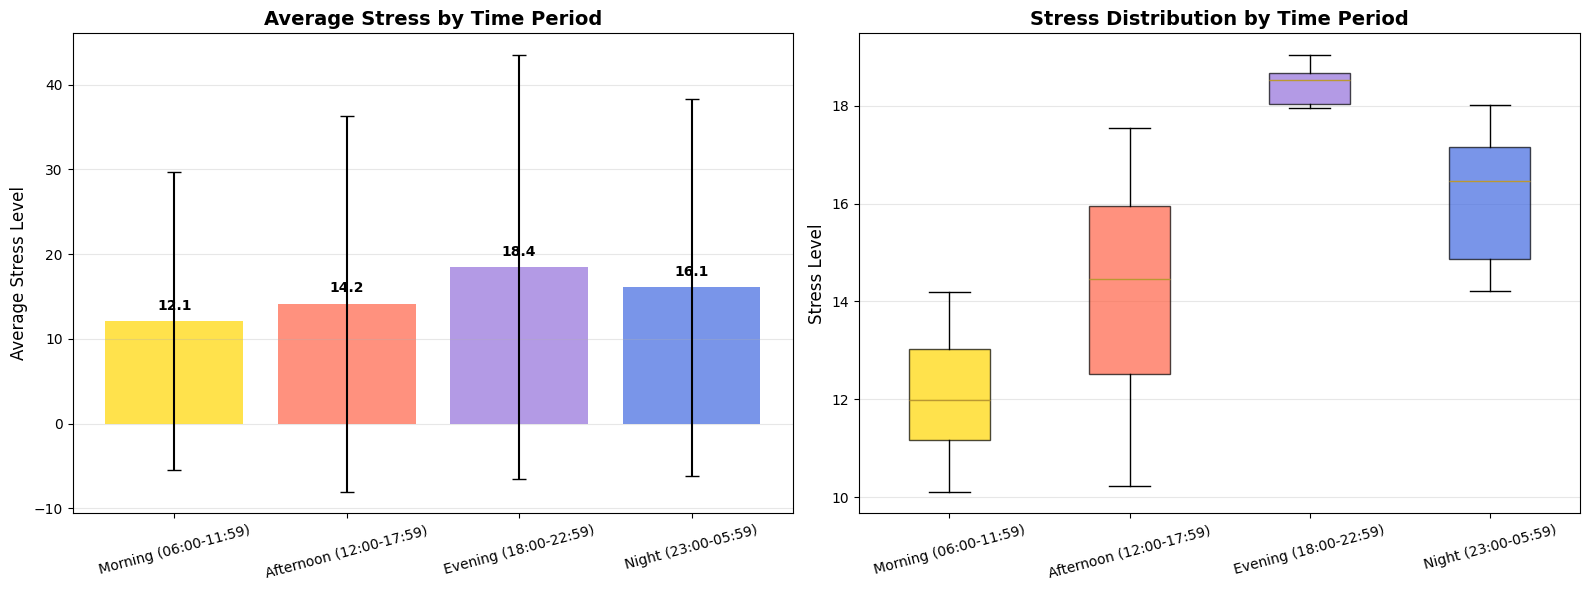

In [ ]:
# Define time periods
time_periods = {
    'Morning (06:00-11:59)': hourly_stats[hourly_stats['hour'].between(6, 11)],
    'Afternoon (12:00-17:59)': hourly_stats[hourly_stats['hour'].between(12, 17)],
    'Evening (18:00-22:59)': hourly_stats[hourly_stats['hour'].between(18, 22)],
    'Night (23:00-05:59)': hourly_stats[hourly_stats['hour'].isin([23, 0, 1, 2, 3, 4, 5])]
}

# Calculate statistics for each period
period_stats = []
for period_name, period_data in time_periods.items():
    if not period_data.empty:
        period_stats.append({
            'Period': period_name,
            'Mean': period_data['mean'].mean(),
            'Median': period_data['median'].mean(),
            'Std Dev': period_data['std'].mean(),
            'Min': period_data['min'].min(),
            'Max': period_data['max'].max()
        })

period_df = pd.DataFrame(period_stats)
print("Stress Levels by Time Period:")
print(period_df.to_string(index=False))

# Visualize time period comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['#FFD700', '#FF6347', '#9370DB', '#4169E1']
bars = ax1.bar(period_df['Period'], period_df['Mean'], 
               yerr=period_df['Std Dev'], capsize=5, alpha=0.7, color=colors)
ax1.set_ylabel('Average Stress Level', fontsize=12)
ax1.set_title('Average Stress by Time Period', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=15)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, period_df['Mean']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Box plot representation
box_data = [time_periods[p]['mean'].values for p in period_df['Period']]
bp = ax2.boxplot(box_data, tick_labels=period_df['Period'], patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_ylabel('Stress Level', fontsize=12)
ax2.set_title('Stress Distribution by Time Period', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Key Insights

Identify the most important patterns in stress levels.


In [ ]:
print("="*80)
print("KEY INSIGHTS: STRESS PATTERNS")
print("="*80)

# Overall statistics
print(f"\n📊 Overall Statistics:")
print(f"   Total measurements: {hourly_stats['count'].sum():,}")
print(f"   Overall mean stress: {hourly_stats['mean'].mean():.1f}")
print(f"   Overall variability (CV): {(hourly_stats['mean'].std() / hourly_stats['mean'].mean() * 100):.1f}%")

# Peak stress times
print(f"\n⬆️  Top 5 Peak Stress Hours:")
top_5 = hourly_stats.nlargest(5, 'mean')
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    hour = int(row['hour'])
    print(f"   {i}. {hour:02d}:00 - {(hour+1):02d}:00: {row['mean']:.1f} ± {row['std']:.1f}")

# Low stress times
print(f"\n⬇️  Top 5 Low Stress Hours:")
bottom_5 = hourly_stats.nsmallest(5, 'mean')
for i, (_, row) in enumerate(bottom_5.iterrows(), 1):
    hour = int(row['hour'])
    print(f"   {i}. {hour:02d}:00 - {(hour+1):02d}:00: {row['mean']:.1f} ± {row['std']:.1f}")

# Time period insights
print(f"\n🕐 Time Period Comparison:")
best_period = period_df.loc[period_df['Mean'].idxmin()]
worst_period = period_df.loc[period_df['Mean'].idxmax()]
print(f"   Lowest stress period: {best_period['Period']} ({best_period['Mean']:.1f})")
print(f"   Highest stress period: {worst_period['Period']} ({worst_period['Mean']:.1f})")
print(f"   Difference: {worst_period['Mean'] - best_period['Mean']:.1f}")

# Day of week insights
print(f"\n📅 Day of Week Patterns:")
day_averages = hourly_weekday_stats.groupby('day_of_week')['mean'].mean()
best_day = day_averages.idxmin()
worst_day = day_averages.idxmax()
print(f"   Lowest stress day: {best_day} ({day_averages[best_day]:.1f})")
print(f"   Highest stress day: {worst_day} ({day_averages[worst_day]:.1f})")
print(f"   Difference: {day_averages[worst_day] - day_averages[best_day]:.1f}")

# Weekend vs weekday
weekend_days = ['Saturday', 'Sunday']
weekend_data = hourly_weekday_stats[hourly_weekday_stats['day_of_week'].isin(weekend_days)]
weekday_data = hourly_weekday_stats[~hourly_weekday_stats['day_of_week'].isin(weekend_days)]
weekend_avg = weekend_data['mean'].mean()
weekday_avg = weekday_data['mean'].mean()
print(f"\n📆 Weekend vs Weekday:")
print(f"   Weekend average: {weekend_avg:.1f}")
print(f"   Weekday average: {weekday_avg:.1f}")
print(f"   Weekend effect: {((weekend_avg - weekday_avg) / weekday_avg * 100):+.1f}%")

print("\n" + "="*80)


## 8. Export Results

Save the analysis results for future reference.


In [ ]:
# Save results to CSV
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save hourly stats
hourly_output = f"../reports/stress_hourly_stats_{timestamp}.csv"
hourly_stats.to_csv(hourly_output, index=False)
print(f"✓ Hourly stats saved to: {hourly_output}")

# Save weekday-hour stats
weekday_output = f"../reports/stress_weekday_hourly_stats_{timestamp}.csv"
hourly_weekday_stats.to_csv(weekday_output, index=False)
print(f"✓ Weekday-hourly stats saved to: {weekday_output}")

# Save time period stats
period_output = f"../reports/stress_time_period_stats_{timestamp}.csv"
period_df.to_csv(period_output, index=False)
print(f"✓ Time period stats saved to: {period_output}")

# Generate plot files using the module functions
print(f"\n✓ Generating visualization files...")
plot_files_hourly = plot_hourly_stress_pattern(hourly_stats, save_plots=True, show_plots=False)
plot_files_heatmap = plot_stress_heatmap_by_weekday(hourly_weekday_stats, save_plots=True, show_plots=False)

all_plots = {**plot_files_hourly, **plot_files_heatmap}
print(f"\n✓ Generated {len(all_plots)} visualization files:")
for plot_name, filepath in all_plots.items():
    print(f"  - {plot_name}: {filepath}")
